In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
import csv

In [2]:
N = 3 # number of oscillators
k = 1. # coupling strength
gamma = (2.*k)/np.pi # rescaling constant

# intrinsic angular frequencies
w1 = 0.
w2 = 0.
w3 = 0.
w = np.array([w1, w2, w3])*2.0*np.pi # vector with the intrinsic angular velocities 

A = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]]) # adjacency matrix

In [3]:
# Diff eqs for each variable: dy/dt = f(t, y)
def der_R(t, R, alpha):
    dR = np.zeros(len(R))
    for i in range(len(R)):
        for j in range(len(R)):
            #dR[i] += gamma*A[i,j]*R[j]*np.cos(alpha[j]-alpha[i])      
            dR[i] += A[i,j]*R[j]*np.cos(alpha[j]-alpha[i])
    return dR

def der_alpha(t, alpha, R):
    dalpha = np.zeros(len(alpha))
    for i in range(len(alpha)):
        for j in range(len(alpha)):
            #dalpha[i] += gamma*A[i,j]*(R[j]/R[i])*np.sin(alpha[j]-alpha[i])
            dalpha[i] += A[i,j]*(R[j]/R[i])*np.sin(alpha[j]-alpha[i])
    return dalpha

In [4]:
def rk4_multivariable_R(t, h, R0, alpha0):
    R_rk4 = np.zeros(len(R0))
    k1 = der_R(t, R0, alpha0)
    k2 = der_R(t, R0+(h/2.)*k1, alpha0)
    k3 = der_R(t, R0+(h/2.)*k2, alpha0)
    k4 = der_R(t, R0+h*k3, alpha0)
    R_rk4 = R0 + (h/6.)*(k1 + 2*k2 + 2*k3 + k4) 
    return R_rk4   

def rk4_multivariable_alpha(t, h, alpha0, R0):
    alpha_rk4 = np.zeros(len(alpha0))
    k1 = der_alpha(t, alpha0, R0)
    k2 = der_alpha(t, alpha0+(h/2.)*k1, R0)
    k3 = der_alpha(t, alpha0+(h/2.)*k2, R0)
    k4 = der_alpha(t, alpha0+h*k3, R0)
    alpha_rk4 = alpha0 + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)  
    
    for i in range(len(alpha_rk4)):        
        # We limit the solution between -pi and pi   
        if np.pi < alpha_rk4[i] < 2.*np.pi:
            alpha_rk4[i] = alpha_rk4[i] - 2.*np.pi
        if -2.*np.pi < alpha_rk4[i] < -np.pi:
            alpha_rk4[i] = alpha_rk4[i] + 2.*np.pi         
    return alpha_rk4   

In [5]:
file = open("results_2021.txt", "w")
writer = csv.writer(file, delimiter = ' ')


# Initial conditions
t0 = 0
dt = 0.0001
steps = 100000

R0 = np.array([1., 2., 1.25])  # t=0 (R1, R2, R3)
alpha0 = np.array([1., -0.2, 0.5])*np.pi  # t=0 (alpha1, alpha2, alpha3)

writer.writerow((t0, R0[0], R0[1], R0[2], alpha0[0], alpha0[1], alpha0[2]))

# integration over time
for n in range(1, steps):
    t = t0 + n*dt # time
    #theta = rk4_multivariable_theta(t, dt, theta0) # vector with the solution of each time iteration
    #theta0 = theta
    R = rk4_multivariable_R(t, dt, R0, alpha0) # vector with the solution of each time iteration
    alpha = rk4_multivariable_alpha(t, dt, alpha0, R0) # vector with the solution of each time iteration
    R0 = R
    alpha0 = alpha
    
    writer.writerow(("{:.4f}".format(t), "{:.6f}".format(R[0]), "{:.6f}".format(R[1]), "{:.6f}".format(R[2]), 
                     "{:.6f}".format(alpha[0]), "{:.6f}".format(alpha[1]), "{:.6f}".format(alpha[2])))  
file.close()   

**DATA PROCESSING**

In [6]:
N = 3 # number of oscillators
steps = 100000

time = np.zeros(steps)
#theta = np.zeros((steps,N))
R = np.zeros((steps,N))
alpha = np.zeros((steps,N))

lines = 0 # counter
with open("results_2021.txt","r") as file1:
    for line in file1:
        line = line.split(' ')
        time[lines] = float(line[0])
        R[lines]=line[1:4:]
        alpha[lines]=line[4:7:]
        lines+=1 

<ipython-input-7-71d49d70ade8>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


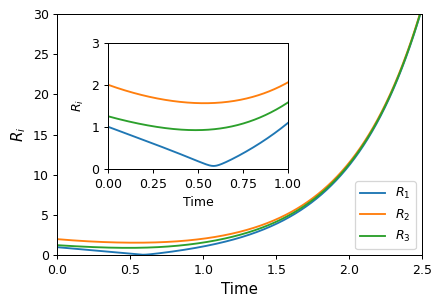

In [7]:
fig, ax1 = plt.subplots(figsize=(5,3.5), dpi=90)
plt.ylabel(r'$R_{i}$', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.plot(time, R[:,0] ,'-', label=r'$R_{1}$')  
plt.plot(time, R[:,1] ,'-', label=r'$R_{2}$')  
plt.plot(time, R[:,2] ,'-', label=r'$R_{3}$')  
plt.legend(loc='lower right') #bbox_to_anchor=(1, 0.5)
plt.xlim((0,2.5))
plt.ylim((0,30))

plt.tight_layout()

left, bottom, width, height = [0.25, 0.45, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(time,R[:,0], label=r'$\theta_{1}$')
ax2.plot(time,R[:,1], label=r'$\theta_{2}$') 
ax2.plot(time,R[:,2], label=r'$\theta_{3}$') 
plt.ylim((0,3))
plt.xlim((0,1))
plt.ylabel(r'$R_{i}$')
plt.xlabel('Time')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Ri_2021.png')
plt.show()

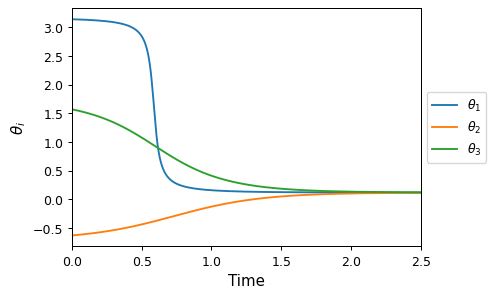

In [8]:
plt.figure(figsize=(5,3.5), dpi=90)
plt.ylabel(r'$\theta_{i}$',fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.plot(time,alpha[:,0], label=r'$\theta_{1}$')  
plt.plot(time,alpha[:,1], label=r'$\theta_{2}$') 
plt.plot(time,alpha[:,2], label=r'$\theta_{3}$') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim((0,2.5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('linear_reform.png')
plt.show()